# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [2]:
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
drive.mount('/content/drive')
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/My Drive/tinkoff/creditcard.csv') # Нужно добавить этот файл в колаб, т.к. там проблемы с доступом
ex_data=df['Class']
ex_data=ex_data.where(ex_data==1)
ex_data=ex_data.dropna()
ex_data #проверяю есть ли вообще классы == 1

Mounted at /content/drive


541       1.0
623       1.0
4920      1.0
6108      1.0
6329      1.0
         ... 
279863    1.0
280143    1.0
280149    1.0
281144    1.0
281674    1.0
Name: Class, Length: 492, dtype: float64

In [ ]:
pd.isna(df) #it seems to has no NaN values :)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [72]:
def get_accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred) / y_true.size
def precision(y_real, y_pred):
  return np.sum(((y_real == 1) == y_pred)) / (y_pred == 1).size
def recall(y_real, y_pred):
  return np.sum((y_real == y_pred) & (y_real == 1)) / (y_real == 1).size
const_model = np.zeros(284807)
const_model.reshape(284807,1)
Y = df['Class']
print(get_accuracy(Y, const_model)) 


0.9982725143693799


Собственно, почти все операции не мошеннические.

In [73]:
from sklearn import linear_model
X = df.drop(columns=["Class"])
X = np.array(X)
log_reg = linear_model.LogisticRegression(fit_intercept=True).fit(X=X, y=Y)
log_predictions = log_reg.predict(X)
print(get_accuracy(Y, log_predictions))

0.9989185659060346


Почти тот же результат по метрике accuracy, доказательство несостоятельности такой метрики.

In [6]:
neighbors_model = KNeighborsClassifier(n_neighbors=5).fit(X=X, y=Y)
predictions = neighbors_model.predict(X)
print(get_accuracy(y_true=Y, y_pred=predictions))

KeyboardInterrupt: ignored

Теперь давайте проверим полноту и точность наших моделей.

In [ ]:
print(f" Константная модель: recall:  {recall(Y, const_model)} precision: {precision(Y, const_model)}")
print(f" KNN : recall:  {recall(Y, predictions)} precision: {precision(Y, predictions)}")
print(f" Логистическая регрессия:  {recall(Y, log_predictions)} precision: {precision(Y, log_predictions)}")

 Константная модель: recall:  0.0 precision: 0.9982725143693799
 KNN : recall:  0.00019311323106524768 precision: 0.9984621164507895
 Логистическая регрессия:  0.0011973020326045357 precision: 0.9989185659060346


Построим функцию вычисляющую $F_1 \quad score$ для нашей модели.

В общем случае метрика $F_{\beta} = (1+\beta^2) * \frac {precision*recall}{\beta^2 * precision + recall}$

In [ ]:
def Fscore(beta, precision , recall):
  return ((1+beta**2)*((precision*recall)/(beta*beta * precision + recall)))
#проверим F1 score для идеальной модели
score=Fscore(1, 1,1)
print(score)

1.0


Отлично! Давайте посмотрим на $F_1$ score наших моделей.

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(Y, const_model)) #предсказания константной модели
print(f1_score(Y, predictions)) #предсказания KNN
print(f1_score(Y, log_predictions)) # предсказания логистической регрессии

0.0
0.20072992700729927
0.6888888888888889


Закономерно, что константная модель не отыскала ни одного положительно класса => $recall=0$.

KNN не смог отыскать всех представителей положительного класса в силу несбалансированного датасета.

Среди всех моделей наивысший $F_1$ score у логистической регрессии.

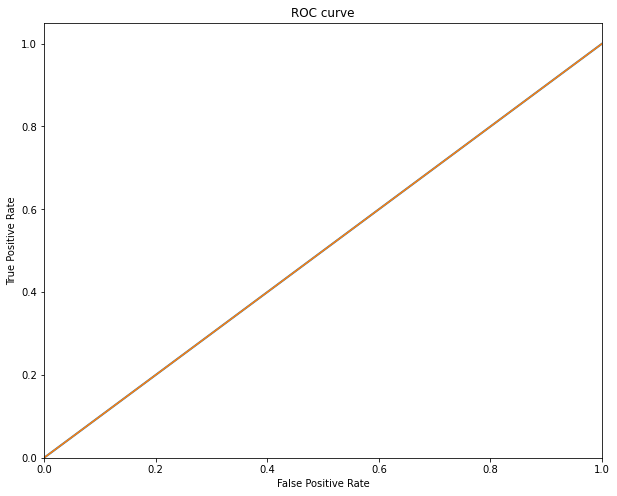

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y, const_model, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

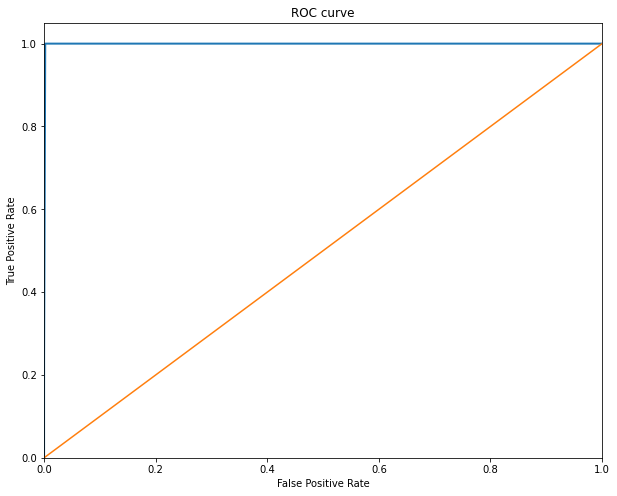

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y, neighbors_model.predict_proba(X)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Тут получилась очень странная кривая, скорее всего это из-за интропретации вероятности в модели ближайших соседей, если увеличить K, как гиперпараметр, то ситуация должна поменяться, но я не стану тратить еще час на обучение KNN.

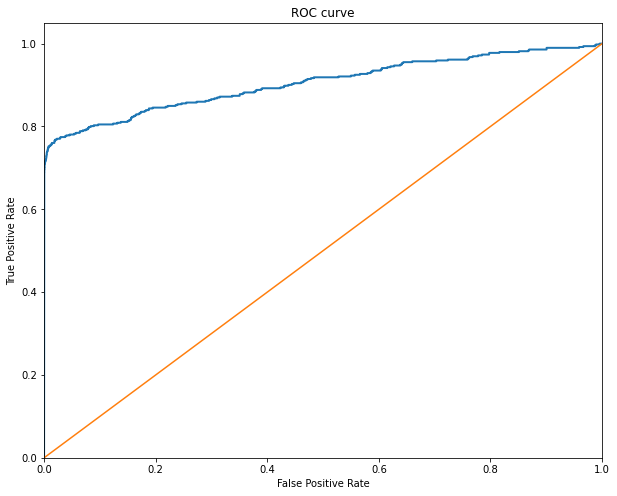

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y, log_reg.predict_proba(X)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score as ras
print(ras(Y,const_model))
print(ras(Y,predictions))
print(ras(Y,log_predictions))

0.5
0.5558925503302832
0.8462686132365782


### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

# Я выберу метрику recall,

 ведь нам не так и важна точность (precision) (в пределах разумного заблокировать карту нескольких НЕ мошенников, но зато точно заблокировать все карты МОШЕННИКОВ). По этой же причине можно не максмизировать $F_{\beta}$ ведь смысл этого скора - объединить значения precision и recall.
ROC-AUC в некотором смысле показывает уверенность нашей модели при определении классов, что мне кажется не таким важным при поиске мошеннических транзакций.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [ ]:
# я не буду использовать KNN, так как датасет в любом случае очень несбалансирован и он покажет плохой recall, а еще потому что обучение KNN занимает очень много времени

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
log_reg = linear_model.LogisticRegression(fit_intercept=True).fit(X=X_train, y=y_train)
log_predictions = log_reg.predict(X_test)
print(recall(y_test, log_predictions))
print(recall(Y, log_reg.predict(X)))

0.0011235560549138022
0.0012324135291618536


In [ ]:
log_reg_w = linear_model.LogisticRegression(class_weight={0: 1, 1: 10},  max_iter=1000).fit(X_train, y_train) # поощаряем модель за нахождение положительных классов
log_reg_w_pred = log_reg_w.predict(X_test)
print(recall(y_test, log_reg_w_pred))
print(recall(Y, log_reg_w.predict(X)))

0.0012991116884940837
0.0013904152636697834


# ☹

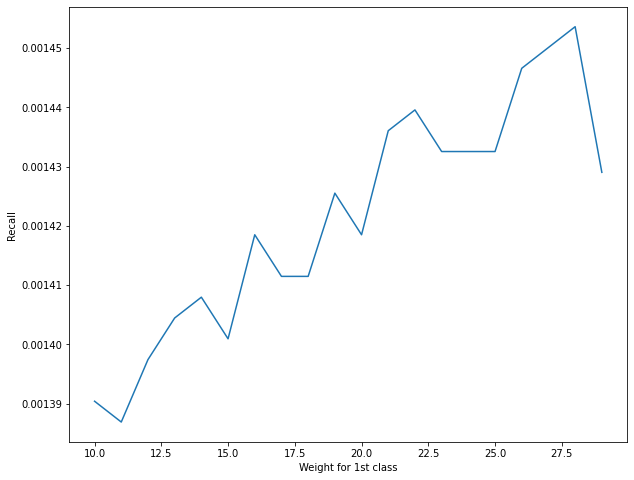

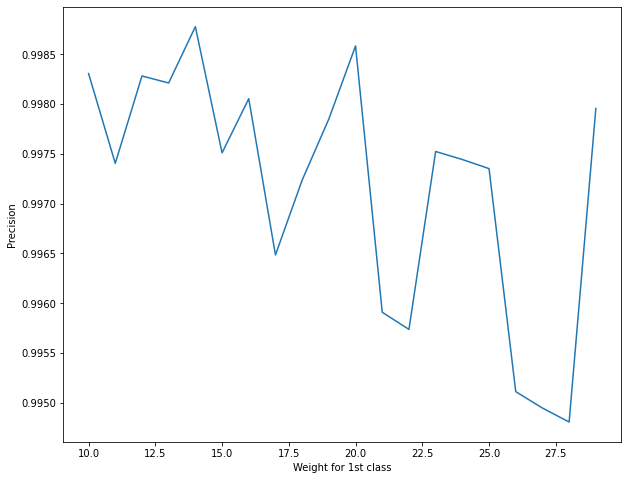

In [76]:
recall_list=[]
precision_list=[]
for i in range(10, 30):
  log_reg_w = linear_model.LogisticRegression(class_weight={0: 1, 1: i},  max_iter=1000).fit(X_train, y_train) # поощаряем модель за нахождение положительных классов
  log_reg_w_pred = log_reg_w.predict(X)
  recall_list.append(recall(Y, log_reg_w_pred))
  precision_list.append(precision(Y, log_reg_w_pred))
plt.figure(figsize=(10, 8))
plt.plot(range(10,30), recall_list)
plt.xlabel("Weight for 1st class")
plt.ylabel("Recall")
plt.show()
plt.figure(figsize=(10, 8))
plt.plot(range(10,30), precision_list)
plt.xlabel("Weight for 1st class")
plt.ylabel("Precision")
plt.show()

Как мы видим, с увелечением "ценности" класса 1 recall увеличивается, а precision уменьшается. Однако ни тот ни другой показатель ЗНАЧИТЕЛЬНО не меняются. Похоже, что значение 30 будет для нас оптимальным.

Попробуем обучить модель на несбалансированном в другую сторону датасете.

In [ ]:
x_experimental = df[df["Class"]==1]
x_experimental = pd.concat([x_experimental,df[df["Class"]==0].head(100)])
y_experimental = x_experimental["Class"]
x_experimental = x_experimental.drop(columns=['Class'])
x_experimental.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,0.064133,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.298405,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.225920,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.028352,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28
99,68.0,1.232996,0.189454,0.491040,0.633673,-0.511574,-0.990609,0.066240,-0.196940,0.075921,...,-0.077871,-0.251566,-0.770139,0.125998,0.369627,0.205598,0.094062,-0.033138,0.020990,15.99


In [ ]:
y_experimental.describe()

count    592.000000
mean       0.831081
std        0.374997
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [ ]:
print(y_experimental[y_experimental==0].count())

100


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x_experimental , y_experimental, test_size=0.3)
experimental_log_reg=linear_model.LogisticRegression(fit_intercept=True).fit(X_train, y_train)
print(get_accuracy(y_pred=experimental_log_reg.predict(X_test), y_true=y_test))
print(get_accuracy(y_pred=experimental_log_reg.predict(X), y_true=Y))

1.0
0.0029282988128803015


In [ ]:
print(recall(y_real=Y, y_pred=experimental_log_reg.predict(X)))
print(precision(y_real=Y, y_pred=experimental_log_reg.predict(X)))

0.001727485630620034
0.0029282988128803015


Лучше, но precision сильно ухудшилось.

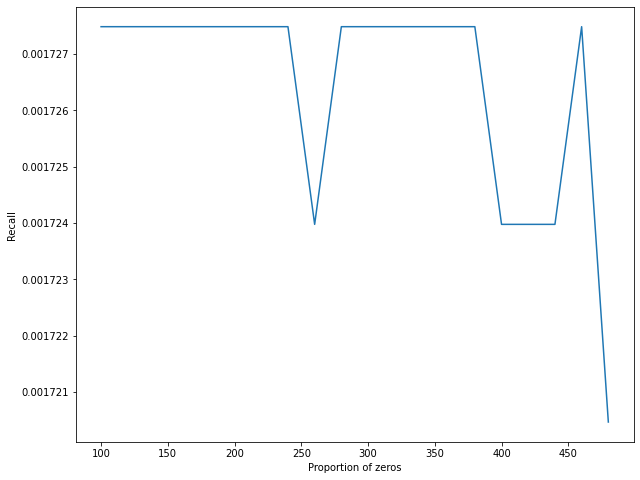

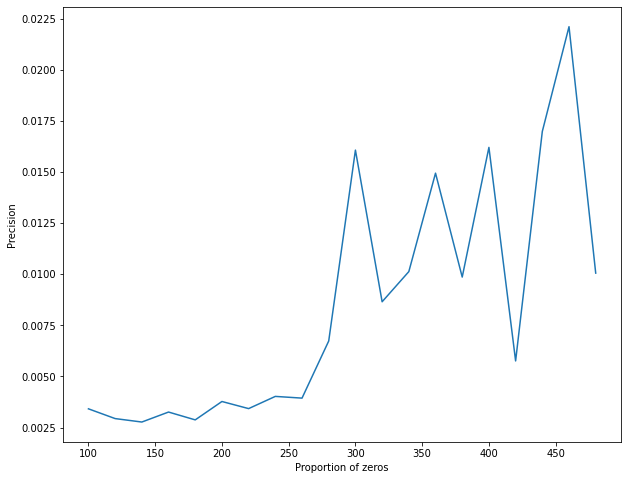

In [ ]:
recall_list=[]
precision_list=[]
for i in range(100, 500, 20): #добавляем больше 0 в несбалансированный новый датасет
  x_experimental = df[df["Class"]==1]
  x_experimental = pd.concat([x_experimental,df[df["Class"]==0].head(i)])
  y_experimental = x_experimental["Class"]
  x_experimental = x_experimental.drop(columns=['Class'])
  X_train,X_test, y_train, y_test = train_test_split(x_experimental , y_experimental, test_size=0.3)
  experimental_log_reg=linear_model.LogisticRegression(fit_intercept=True).fit(X_train, y_train)
  recall_list.append(recall(Y, experimental_log_reg.predict(X)))
  precision_list.append(precision(Y, experimental_log_reg.predict(X)))
plt.figure(figsize=(10, 8))
plt.plot(range(100,500,20), recall_list)
plt.xlabel("Proportion of zeros")
plt.ylabel("Recall")
plt.show()
plt.figure(figsize=(10, 8))
plt.plot(range(100,500,20), precision_list)
plt.xlabel("Proportion of zeros")
plt.ylabel("Precision")
plt.show()

Результат всё равно плачевный. По итогу лучший метод - увеличенный штраф за False Negative ошибки.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Ссылка на датасет: https://www.kaggle.com/datasets/imohtn/video-games-rating-by-esrb

In [11]:
data = pd.read_csv('/content/drive/My Drive/tinkoff/Video_games_esrb_rating.csv')
test = pd.read_csv('/content/drive/My Drive/tinkoff/test_esrb.csv')
data

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

#Для начала взглянем на датасет
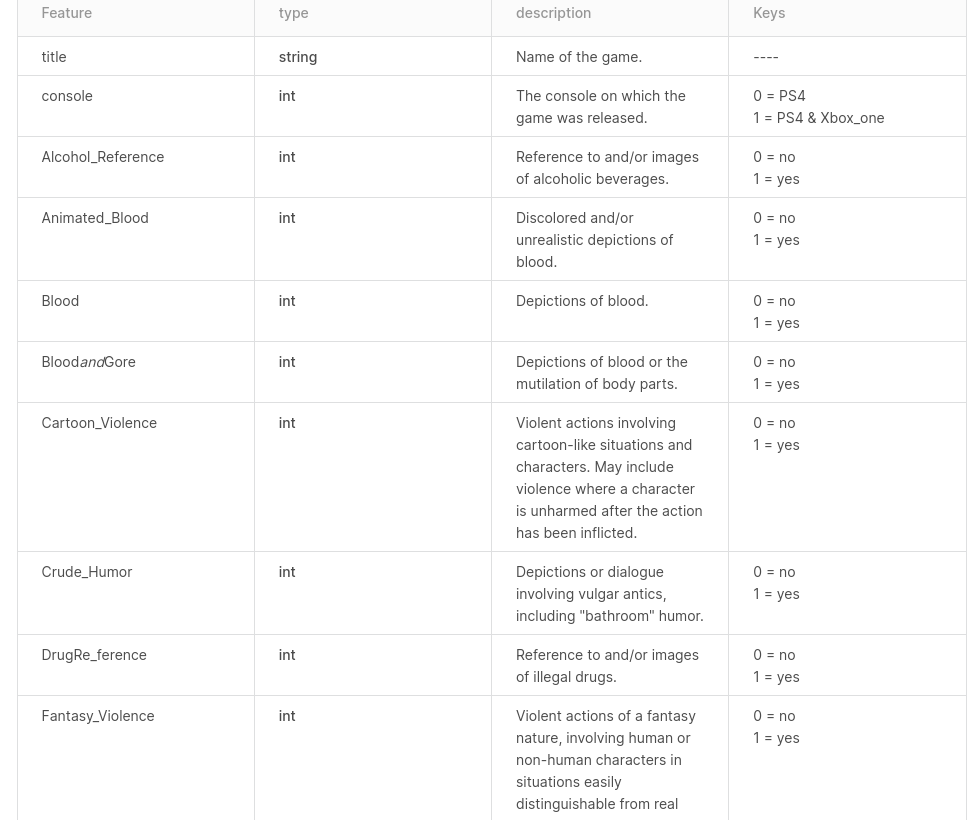

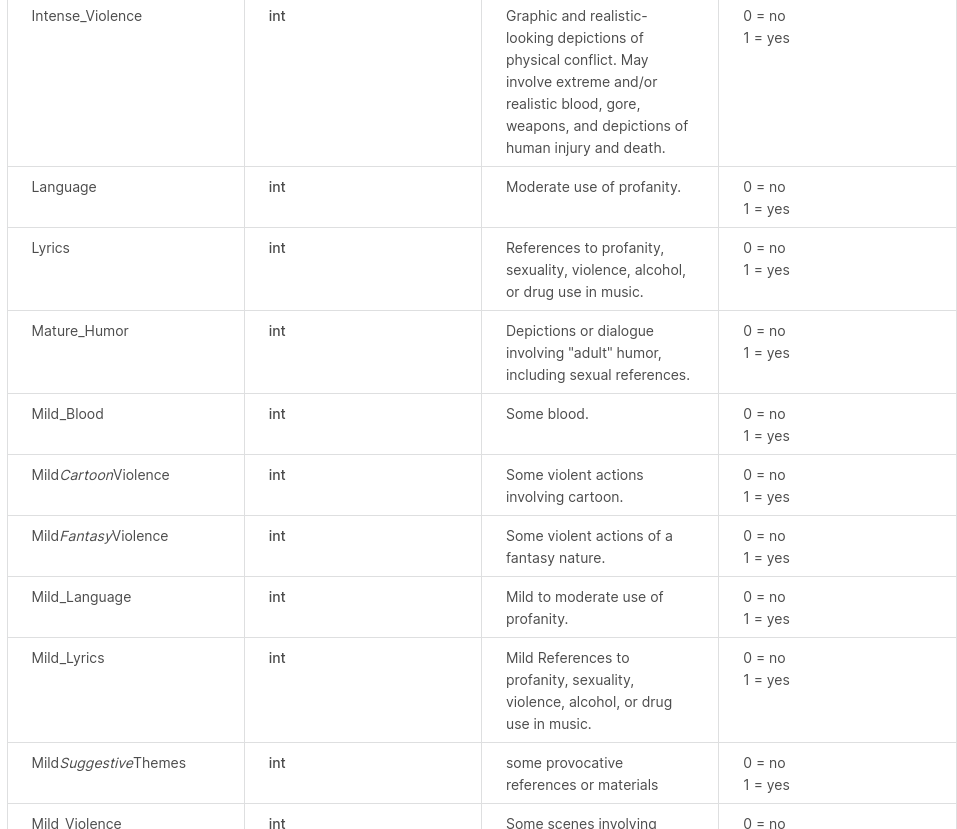

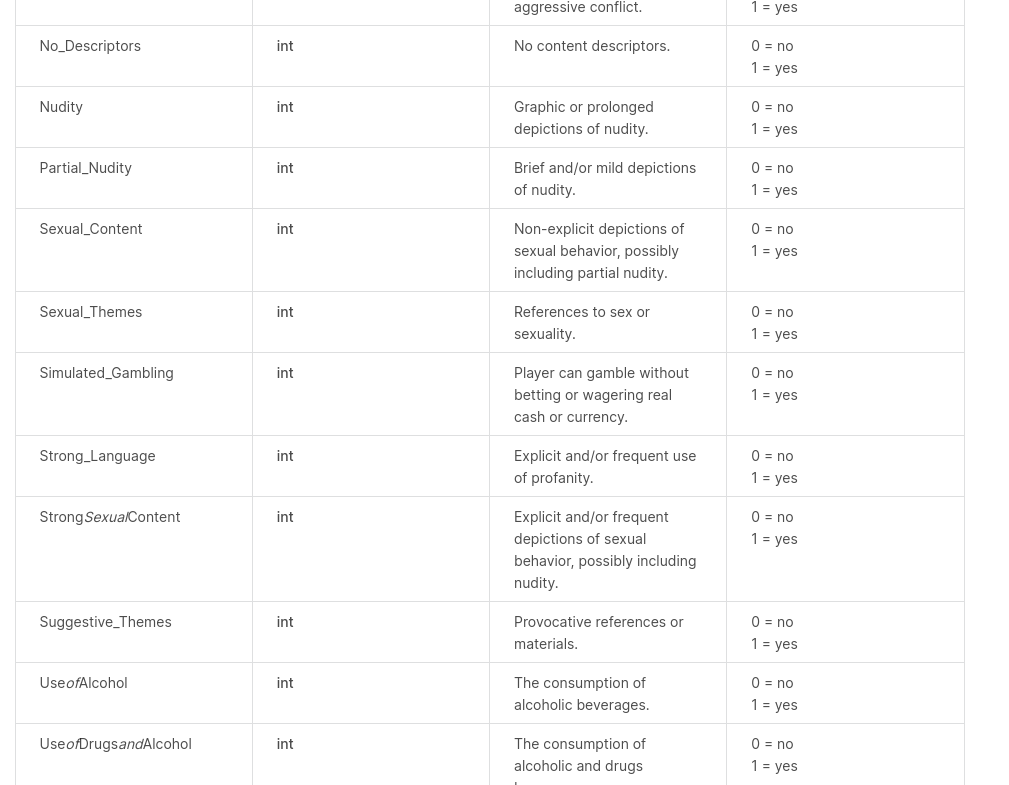

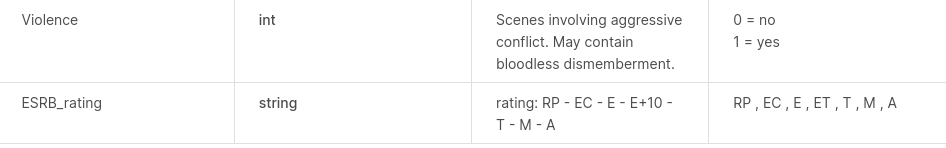

Давайте посмотрим объектов какого рейтинга больше всего.

In [12]:
data["esrb_rating"].describe()

count     1895
unique       4
top          T
freq       689
Name: esrb_rating, dtype: object

In [13]:
data_without_T= data[data["esrb_rating"] != "T"]
data_without_T["esrb_rating"].describe() #второй по популярности рейтинг это Е

count     1206
unique       3
top          E
freq       416
Name: esrb_rating, dtype: object

Попробуем предсказывать только Т и Е в их соотношении в изначальном датасете:
$sum = T + E$

$ proportion\space of \space T= \frac {T}{sum} = 0.62352941176$

$proportion  of \space E= \frac {E}{sum} = 0.37647058823$

Тогда в нашей константной модели (вектор длины 1895) T и E будут идти в случайном порядке в высчитанных пропорциях:

$proportion_{of \space T} = (proportion\space of \space T) \times 1895 ≈ 1175 => proportion_{of \space E} = 1895 - proportion_{of \space T} = 720$



In [14]:
const_model=[]
for i in range(1175):
  const_model.append("T")
for i in range(720):
  const_model.append("E")

const_model= np.array(const_model)
np.random.shuffle(const_model)
print(const_model)

['T' 'E' 'E' ... 'T' 'T' 'E']


In [15]:
from sklearn import metrics
y_true = pd.get_dummies(data['esrb_rating'])
y_true = np.array(y_true)
const_model_vocab=[]
for i in range(1895):
  if const_model[i]== "T":
    const_model_vocab.append([0,0,0,1]) #делаю из конст модели ответы как в get_dummies
  else:
    const_model_vocab.append([1,0,0,0])  
print(metrics.accuracy_score(y_true=y_true, y_pred=const_model_vocab))
print(metrics.recall_score(y_true=y_true, y_pred=const_model_vocab, average='macro'))
print(metrics.precision_score(y_true=y_true, y_pred=const_model_vocab, average='macro'))
print(metrics.f1_score(y_true=y_true, y_pred=const_model_vocab, average='macro'))

0.31345646437994723
0.25553338171262696
0.14897163120567375
0.18821404823792542


# ☹

Печальненький результат.

In [16]:
KNN_model = KNeighborsClassifier(n_neighbors=5).fit(X=data.drop(columns=['esrb_rating', 'title']), y=y_true)
predictions = KNN_model.predict(data.drop(columns=['esrb_rating', 'title']))
print(metrics.accuracy_score(y_true=y_true, y_pred=predictions))
print(metrics.recall_score(y_true=y_true, y_pred=predictions, average='macro'))
print(metrics.precision_score(y_true=y_true, y_pred=predictions, average='macro'))
print(metrics.f1_score(y_true=y_true, y_pred=predictions, average='macro'))

0.858575197889182
0.8667852957055786
0.8794152918450426
0.8719148599808247


Всё ещё не очень. Попробуем SVM.

In [17]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
y_dense = LabelBinarizer().fit_transform(data['esrb_rating'])

log_reg = OneVsRestClassifier(LinearSVC(random_state=0))
log_reg.fit(X=data.drop(columns=['esrb_rating', 'title']), y=y_dense)
log_reg_pred = log_reg.predict(data.drop(columns=['esrb_rating', 'title']))
print(metrics.accuracy_score(y_true=y_dense, y_pred=log_reg_pred))
print(metrics.recall_score(y_true=y_dense, y_pred=log_reg_pred, average='macro'))
print(metrics.precision_score(y_true=y_dense, y_pred=log_reg_pred, average='macro'))
print(metrics.f1_score(y_true=y_dense, y_pred=log_reg_pred, average='macro'))

0.7883905013192612
0.8478680431477004
0.862547151790312
0.8549183534065905


Попробуем логистическую регрессию.

In [18]:
count=0
for i in data['esrb_rating'].unique():
  data['esrb_rating'][data['esrb_rating']==i] = count
  count+=1
y_for_log_reg = data['esrb_rating'].map(lambda x : int(x))
log_reg = linear_model.LogisticRegression(max_iter=10000)
x = np.array(data.drop(columns=['esrb_rating', 'title']))
log_reg.fit(x, y_for_log_reg)
y_pred_log_reg = log_reg.predict(x)
print(metrics.accuracy_score(y_true=y_for_log_reg, y_pred=y_pred_log_reg))
print(metrics.recall_score(y_true=y_for_log_reg, y_pred=y_pred_log_reg, average='macro'))
print(metrics.precision_score(y_true=y_for_log_reg, y_pred=y_pred_log_reg, average='macro'))
print(metrics.f1_score(y_true=y_for_log_reg, y_pred=y_pred_log_reg, average='macro'))

0.8569920844327177
0.8622257954728161
0.8651448181681652
0.8634739453265052


Вот это результат! Давайте попробуем обучить ее на некоторой части и проверить на другой.

In [22]:
X_train, X_test, y_train , y_test = train_test_split(x , y_for_log_reg, train_size=0.7)
log_reg = linear_model.LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred_log_reg))
print(metrics.recall_score(y_true=y_test, y_pred=y_pred_log_reg, average='macro'))
print(metrics.precision_score(y_true=y_test, y_pred=y_pred_log_reg, average='macro'))
print(metrics.f1_score(y_true=y_test, y_pred=y_pred_log_reg, average='macro'))

0.8681898066783831
0.8706921675774134
0.8751271122513724
0.8725975572365187


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Трудно определиться между precision и recall, ведь важно и отгадывать классы верно и в принципе отгадывать их всех, а проблем с интропретацией вероятностей мы не имеем, следовательно наилучшей метрикой будет $F$ мера, а конкретнее $F_1$ мера.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1, 10 , 20],
    'kernel': ['rbf', 'linear']
}, cv=5, return_train_score = False)
clf.fit(X_train, y_train)
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040121,0.003132,0.012652,0.000171,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.755639,0.796226,0.788679,0.781132,0.807547,0.785845,0.017444,6
1,0.016643,0.000941,0.003949,0.000849,1,linear,"{'C': 1, 'kernel': 'linear'}",0.823308,0.830189,0.849057,0.833962,0.852830,0.837869,0.011272,2
2,0.027279,0.000577,0.008497,0.000123,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.823308,0.822642,0.841509,0.830189,0.849057,0.833341,0.010381,4
3,0.022469,0.002043,0.003382,0.000060,10,linear,"{'C': 10, 'kernel': 'linear'}",0.815789,0.833962,0.852830,0.833962,0.826415,0.832592,0.012115,5
4,0.028627,0.001489,0.008272,0.000174,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.842105,0.826415,0.852830,0.841509,0.864151,0.845402,0.012595,1
5,0.026485,0.003605,0.003381,0.000081,20,linear,"{'C': 20, 'kernel': 'linear'}",0.815789,0.833962,0.852830,0.833962,0.833962,0.834101,0.011715,3


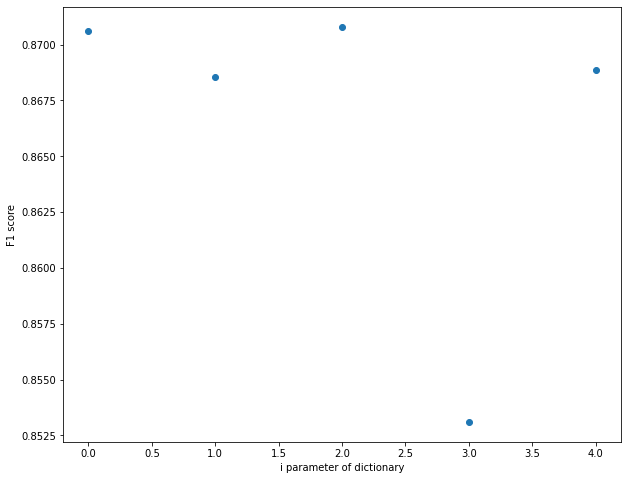

In [29]:
parameters = results['params']
list_of_f1 = []
for i in range(5):
  clf = svm.SVC(C = parameters[i]['C'], kernel =parameters[i]['kernel']).fit(X_train, y_train)
  list_of_f1.append(metrics.f1_score(clf.predict(X_test), y_test, average='macro'))
plt.figure(figsize=(10, 8))
plt.scatter(range(5), list_of_f1)
plt.xlabel('i parameter of dictionary')
plt.ylabel('F1 score')
plt.show()

Перейдем к логистической регрессии.

In [55]:
f1_score_list = []
for j in range(10,30):
  for i in range(10, 30):
    log_reg_w = linear_model.LogisticRegression(class_weight={0: j, 1: i, 2: i+1, 3:j+1},  max_iter=1000).fit(X_train, y_train) 
    log_reg_w_pred = log_reg_w.predict(X_test)
    f1_score_list.append((metrics.f1_score(y_test, log_reg_w_pred, average="macro"),"i:"+ str(i)+" j:"+ str(j)))

In [56]:
f1_score_list

[(0.8772734828472335, 'i:10 j:10'),
 (0.8774070620694245, 'i:11 j:10'),
 (0.8757193147710437, 'i:12 j:10'),
 (0.8809293531515754, 'i:13 j:10'),
 (0.879435567790795, 'i:14 j:10'),
 (0.878611089263039, 'i:15 j:10'),
 (0.878611089263039, 'i:16 j:10'),
 (0.887016669387282, 'i:17 j:10'),
 (0.887016669387282, 'i:18 j:10'),
 (0.887016669387282, 'i:19 j:10'),
 (0.887016669387282, 'i:20 j:10'),
 (0.887016669387282, 'i:21 j:10'),
 (0.8817697875622206, 'i:22 j:10'),
 (0.883477336133601, 'i:23 j:10'),
 (0.8775044485146115, 'i:24 j:10'),
 (0.8760190262589493, 'i:25 j:10'),
 (0.8760190262589493, 'i:26 j:10'),
 (0.8696586661617642, 'i:27 j:10'),
 (0.8713540143022003, 'i:28 j:10'),
 (0.8685853959130162, 'i:29 j:10'),
 (0.8772734828472335, 'i:10 j:11'),
 (0.8755740101611598, 'i:11 j:11'),
 (0.8774070620694245, 'i:12 j:11'),
 (0.8757193147710437, 'i:13 j:11'),
 (0.8809293531515754, 'i:14 j:11'),
 (0.879435567790795, 'i:15 j:11'),
 (0.8801028778794726, 'i:16 j:11'),
 (0.878611089263039, 'i:17 j:11'),
 (0

In [57]:
print(max([pair[0] for pair in f1_score_list]))

0.8887110890725873


In [67]:
arr = np.array(f1_score_list)
print(np.argmax(arr, axis = 0))

[ 50 399]


In [70]:
print(arr[50])

['0.8887110890725873' 'i:20 j:12']


Итак, наилучший $F_1 \space score$ мы смогли получить назначив классам соответствующие веса *(для логистической регрессии)* : 

1: 20

2: 12

3: 13

4: 21

Однако, задача нахождения идеальных весов NP полна и не несет особой пользы - мы смогли повысить значение $F_1$ на незначительную долю, используя логистическую регрессию и SVM. Следовательно, перебирая гиперпараметры и дальше мы вряд ли сильно улучшим результат. Таким моделям не хватает ёмкости для этого датасета, а потому увеличение количества шагов обучения приведёт только к переобучению.